In [2]:
import pyart
import matplotlib.pyplot as plt
import numpy as np
import os
import ipyparallel as ipp

%matplotlib inline


In [3]:
My_Cluster = ipp.Client()
My_View = My_Cluster[:]

good = True

<DirectView [0, 1, 2, 3,...]>
10


/home/scollis/anaconda/lib/python2.7/site-packages/ipyparallel/client/client.py:306: DeprecationWarning: Client._profile_default is deprecated: use @default decorator instead.
  def _profile_default(self):
/home/scollis/anaconda/lib/python2.7/site-packages/ipyparallel/client/client.py:306: DeprecationWarning: Client._profile_default is deprecated: use @default decorator instead.
  def _profile_default(self):
/home/scollis/anaconda/lib/python2.7/site-packages/IPython/core/profiledir.py:57: DeprecationWarning: ProfileDir._location_changed is deprecated: use @observe and @unobserve instead.
  def _location_changed(self, name, old, new):
/home/scollis/anaconda/lib/python2.7/site-packages/IPython/core/profiledir.py:126: DeprecationWarning: ProfileDir._security_dir_changed is deprecated: use @observe and @unobserve instead.
  def _security_dir_changed(self, name, old, new):
/home/scollis/anaconda/lib/python2.7/site-packages/IPython/core/profiledir.py:71: DeprecationWarning: ProfileDir._log_d

In [4]:
print My_View
print len(My_View)

<DirectView [0, 1, 2, 3,...]>
10


In [33]:
indir = '/media/scollis/6d5cbc4e-6656-43ec-b1e0-8224135ac8b7/sample_sapr_data/csapr_rhi/rhi/'
all_dirs = os.listdir(indir)
rhis = []
for dirr in all_dirs:
    this_dir = os.path.join(indir,dirr)
    all_files = os.listdir(this_dir)
    for fl in all_files:
        if os.stat(os.path.join(this_dir, fl)).st_size > 9000000:
            rhis.append(os.path.join(this_dir, fl))
rhis.sort()

In [34]:
print len(rhis), len(all_files)


288 407


In [15]:
def mean_z(filename):
    radar = pyart.io.read(filename)
    mean_zee = radar.fields['reflectivity']['data'].mean()
    tu = radar.time['units']
    del(radar)
    return mean_zee, tu

In [16]:
mean_z(rhis[0])

/home/scollis/anaconda/lib/python2.7/site-packages/IPython/core/formatters.py:92: DeprecationWarning: DisplayFormatter._ipython_display_formatter_default is deprecated: use @default decorator instead.
  def _ipython_display_formatter_default(self):
/home/scollis/anaconda/lib/python2.7/site-packages/IPython/core/formatters.py:669: DeprecationWarning: PlainTextFormatter._singleton_printers_default is deprecated: use @default decorator instead.
  def _singleton_printers_default(self):


(-7.3326487221394583, 'seconds since 2011-05-25T00:03:55Z')

In [35]:
#Turn off blocking so all engines can work async
My_View.block = False

#on all engines do an import of Py-ART
My_View.execute('import matplotlib')
My_View.execute('matplotlib.use("agg")')
My_View.execute('import pyart')





<AsyncResult: finished>

In [36]:
#Map the code and input to all workers
result = My_View.map_async(mean_z, rhis)

#Reduce the result to get a list of output
qvps = result.get()


In [37]:
times = [el[1] for el in qvps]
zees = [el [0] for el in qvps]

In [38]:
print np.array(times).argsort()

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 24

88


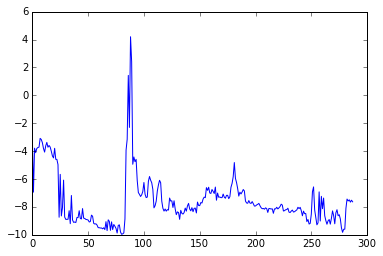

In [40]:
plt.plot(zees)


In [41]:
print np.array(zees).argmax()

88


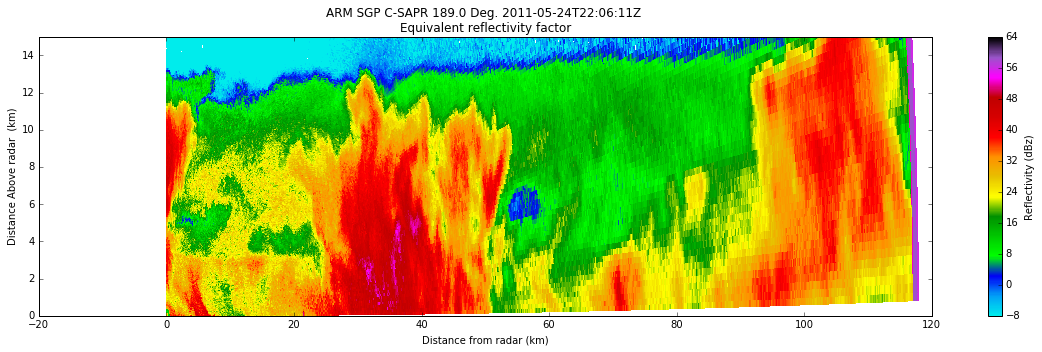

In [56]:
# create the plot using RadarDisplay
sweep = 0
# read file
radar = pyart.io.read_mdv(rhis[88])
display = pyart.graph.RadarDisplay(radar)
fig = plt.figure(figsize=[20, 5])
ax = fig.add_subplot(111)

# plot velocity
display.plot('reflectivity', sweep=sweep, vmin=-8, vmax=64, fig=fig,
             ax=ax, cmap='pyart_NWSRef', colorbar_label='Reflectivity (dBz)')
display.set_limits( ylim=[0, 15])


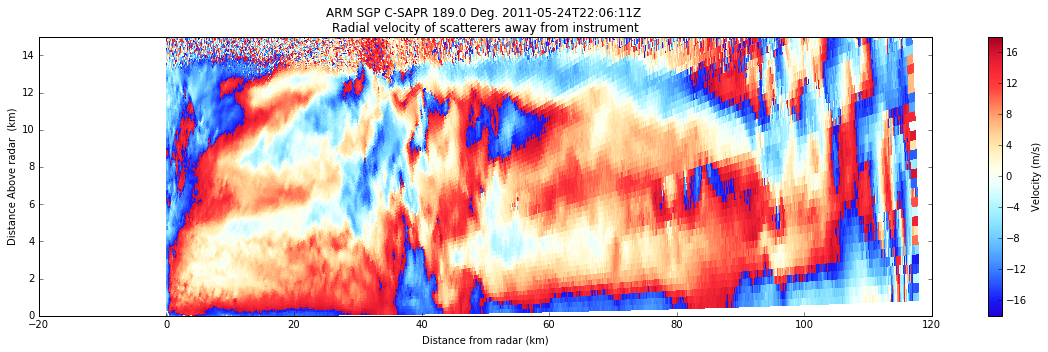

In [53]:
# create the plot using RadarDisplay
sweep = 0
# read file
radar = pyart.io.read_mdv(rhis[88])
display = pyart.graph.RadarDisplay(radar)
fig = plt.figure(figsize=[20, 5])
ax = fig.add_subplot(111)

# plot velocity
display.plot('velocity', sweep=sweep, vmin=-18, vmax=18, fig=fig,
             ax=ax, cmap='pyart_BuDRd18', colorbar_label='Velocity (m/s)')
display.set_limits( ylim=[0, 15])


In [55]:
print rhis[88]
print radar.fields.keys()

/media/scollis/6d5cbc4e-6656-43ec-b1e0-8224135ac8b7/sample_sapr_data/csapr_rhi/rhi/20110524/220629.mdv
['differential_phase', 'cross_correlation_ratio', 'normalized_coherent_power', 'spectrum_width', 'reflectivity', 'differential_reflectivity', 'specific_differential_phase', 'velocity']


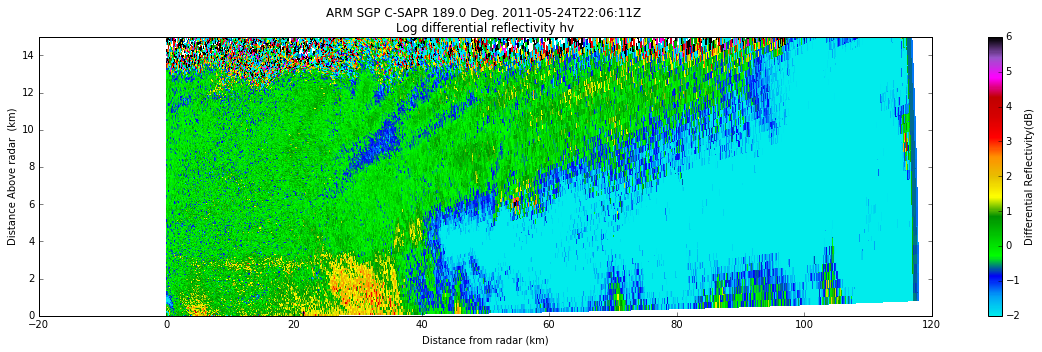

In [58]:
# create the plot using RadarDisplay
sweep = 0
# read file
radar = pyart.io.read_mdv(rhis[88])
display = pyart.graph.RadarDisplay(radar)
fig = plt.figure(figsize=[20, 5])
ax = fig.add_subplot(111)

# plot velocity
display.plot('differential_reflectivity', sweep=sweep, vmin=-2, vmax=6, fig=fig,
             ax=ax, cmap='pyart_NWSRef', colorbar_label='Differential Reflectivity(dB)')
display.set_limits( ylim=[0, 15])
